# ECE 685D, Fall 2020 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Vinayak Gupta


### Problem 1 (Exponential distribution)

In [1]:
# Put your code here 
import random
import math
#libraries for plotting purposes
from matplotlib import pyplot as plt

In [2]:
def exponential_from_uniform(lambda_val):
    return (-1)*math.log(1-random.random())/lambda_val

In [3]:
lambda_val = [0.1,1,10]

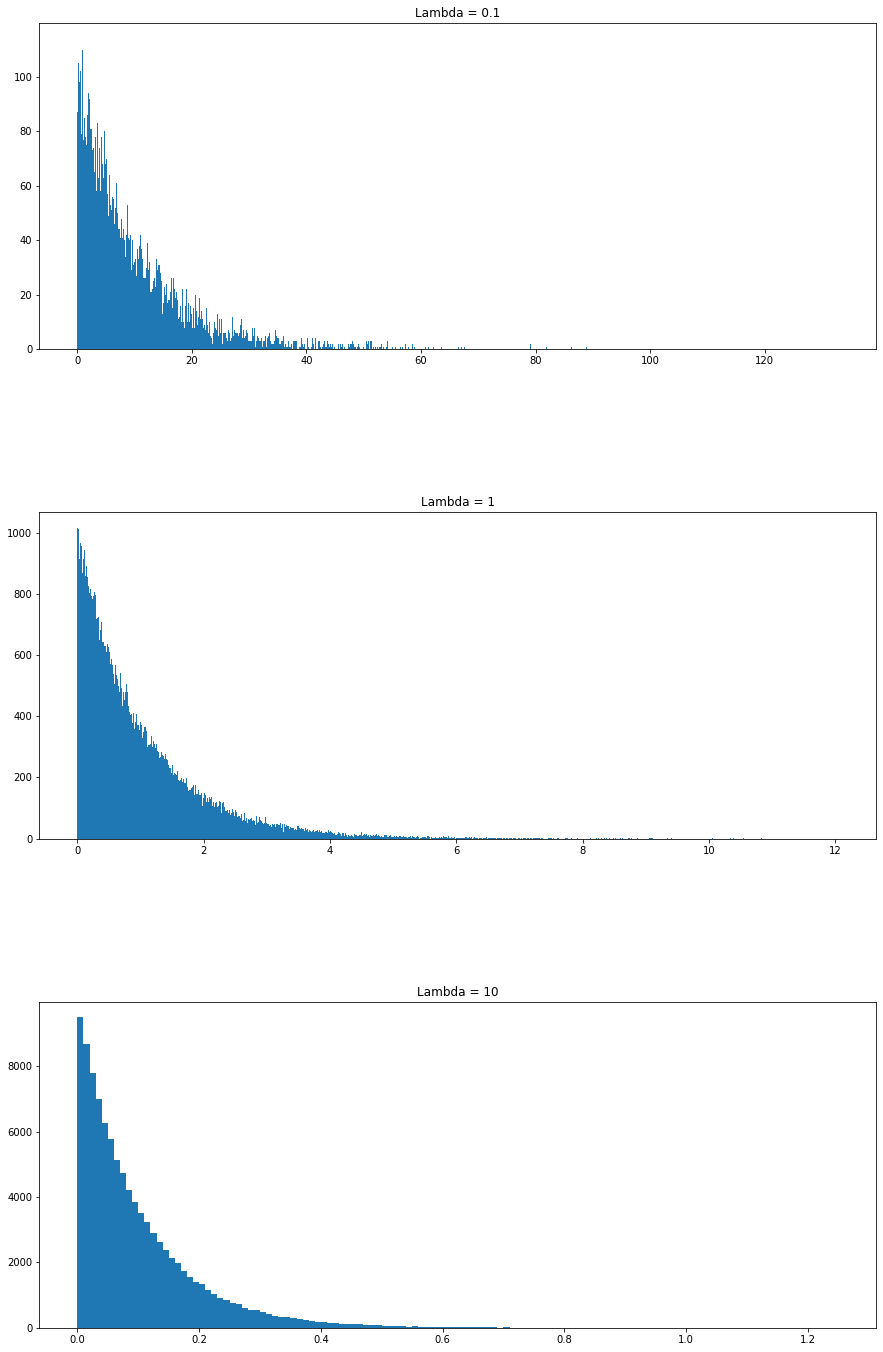

In [4]:
fig= plt.figure()
ax= fig.add_subplot(111)
fig.subplots_adjust(hspace=0.5)
fig.set_figheight(24)
fig.set_figwidth(15)
plt.axis('off')
for i in range(3):
    x= [exponential_from_uniform(lambda_val[i]) for j in range(100000)]
    bin_list = [round(0.01*j,2) for j  in range(int(math.ceil(max(x) * 100))+1)]
    ax= fig.add_subplot(311 + i)
    ax.hist(x, bins=bin_list)
    ax.title.set_text("Lambda = %s" %(lambda_val[i]))
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
plt.show()

### Problem 2 (Gamma distribution)

In [5]:
def sum_of_exp(lambda_val,K):
    y=0
    for j in range(K):
        y=y+ exponential_from_uniform(lambda_val)
    return y

In [6]:
beta_val=[0.1,1,10]
K=5

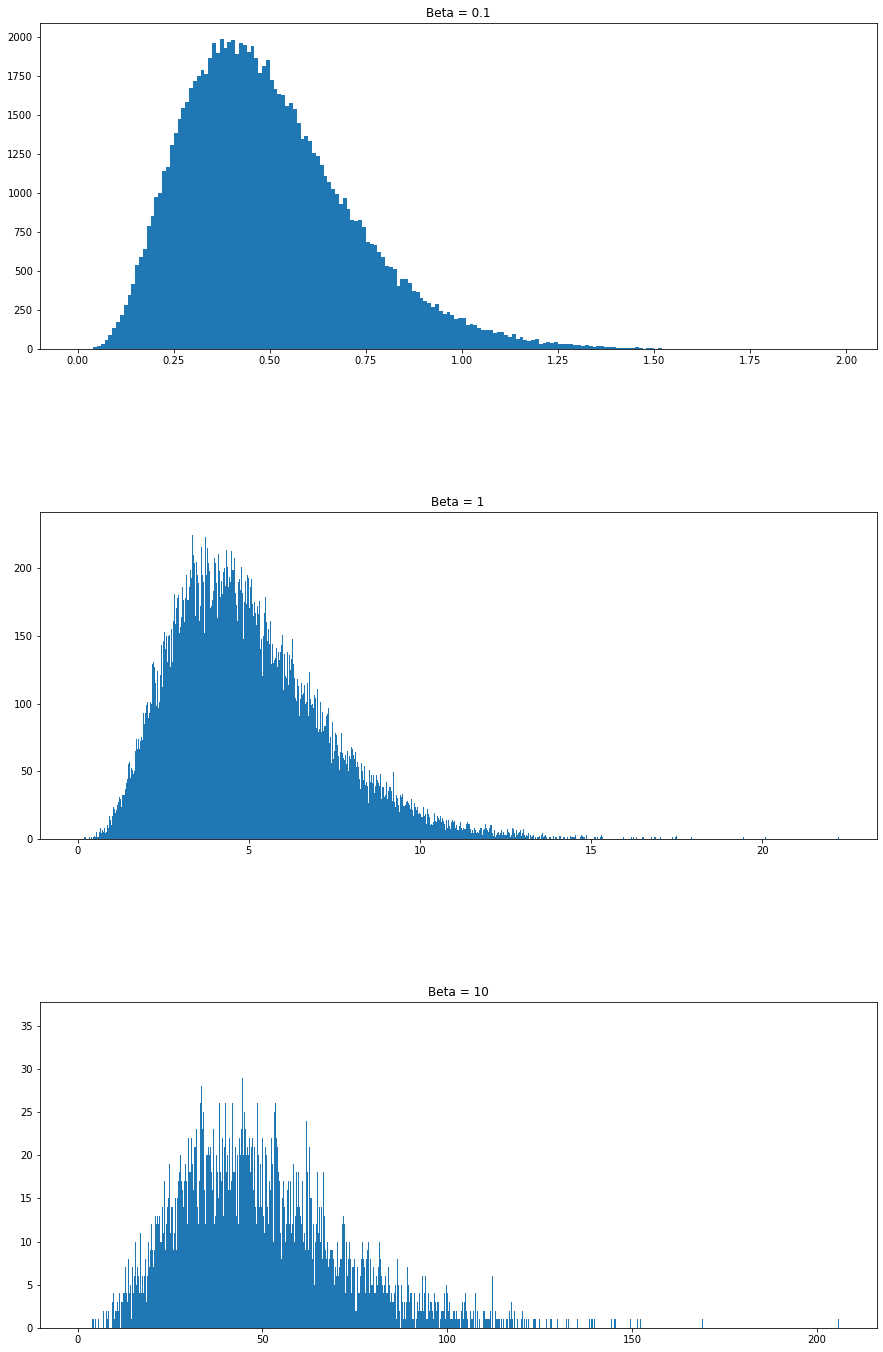

In [7]:
fig= plt.figure()
ax= fig.add_subplot(111)
fig.subplots_adjust(hspace=0.5)
fig.set_figheight(24)
fig.set_figwidth(15)
plt.axis('off')
for i in range(3):
    x= [sum_of_exp(1/beta_val[i],K) for j in range(100000)]
    bin_list = [round(0.01*j,2) for j  in range(int(math.ceil(max(x) * 100))+1)]
    ax1= fig.add_subplot(311 + i)
    ax1.hist(x, bins=bin_list)
    ax1.title.set_text("Beta = %s" %(beta_val[i]))
    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
plt.show()

### Problem 3 (Beta distribution)

In [8]:
def generate_kth_order(n,k):
    arr= [random.random() for i in range(n)]
    return sorted(arr)[k-1]

In [9]:
alpha_1_val=[5,10]
alpha_2_val=[16,11]

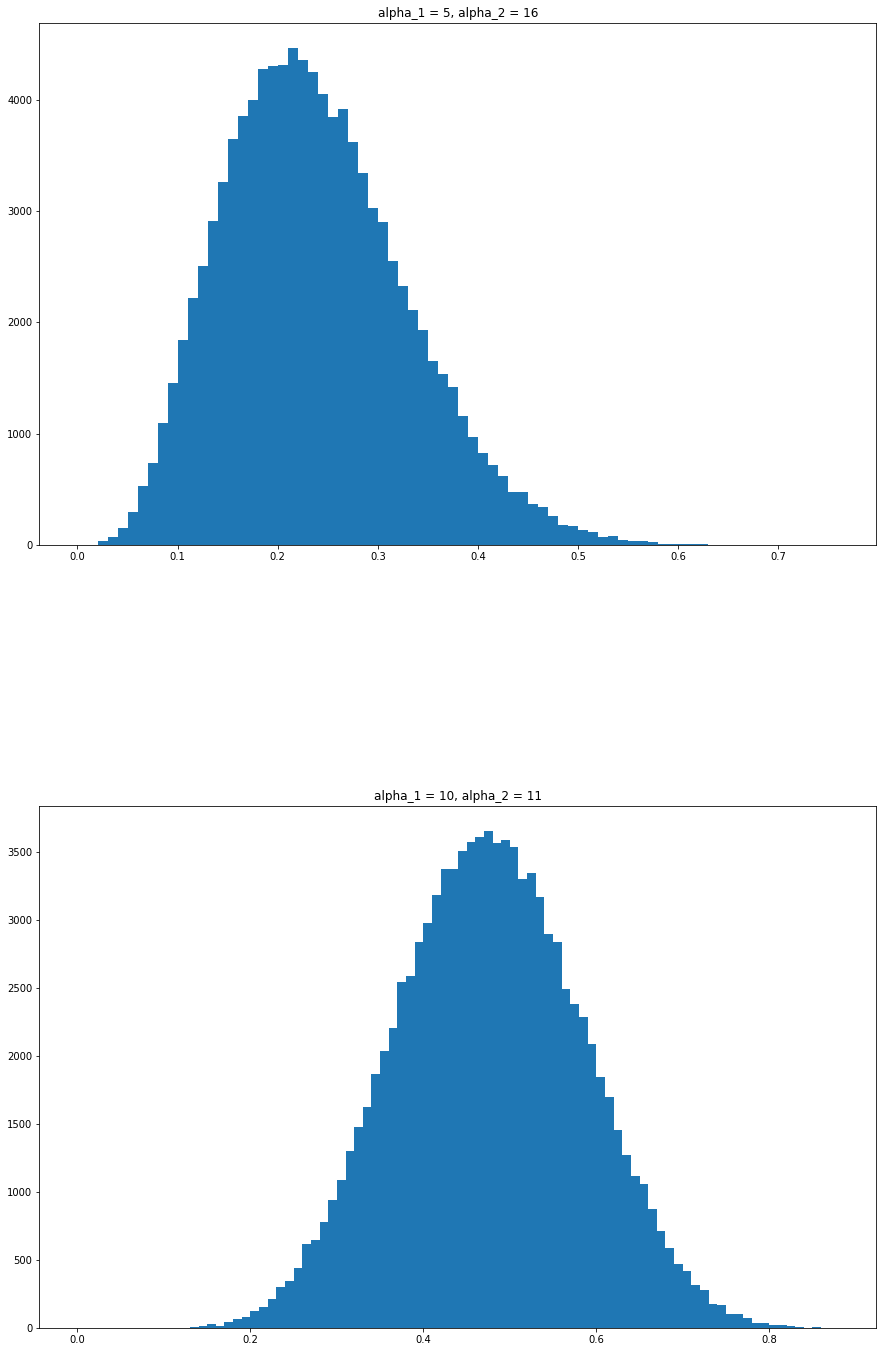

In [10]:
fig= plt.figure()
ax= fig.add_subplot(111)
fig.subplots_adjust(hspace=0.5)
fig.set_figheight(24)
fig.set_figwidth(15)
plt.axis('off')
for i in range(2):
    k = alpha_1_val[i]
    n = alpha_2_val[i]+k-1
    x = [generate_kth_order(n,k) for j in range(100000)]
    bin_list = [round(0.01*j,2) for j  in range(int(math.ceil(max(x) * 100))+1)]
    ax1= fig.add_subplot(211 + i)
    ax1.hist(x, bins=bin_list)
    ax1.title.set_text("alpha_1 = %s, alpha_2 = %s" % (alpha_1_val[i], alpha_2_val[i]))
    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
plt.show()

### Problem 4 (Dirichlet distribution)

In [11]:
# Put your code here 
K=10
beta_val=1

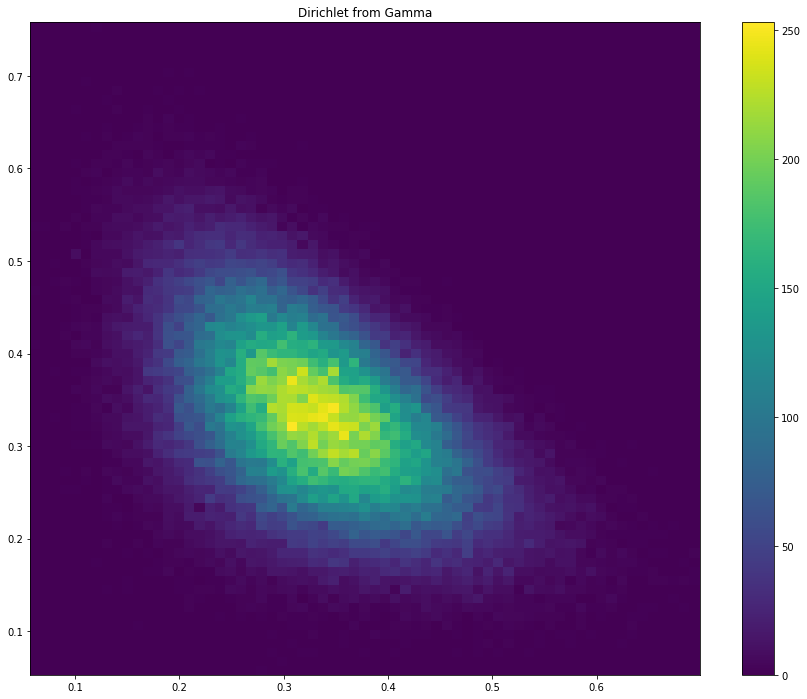

In [12]:
fig= plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

x1= [sum_of_exp(1/beta_val,K) for j in range(100000)]
x2= [sum_of_exp(1/beta_val,K) for j in range(100000)]
x3= [sum_of_exp(1/beta_val,K) for j in range(100000)]

for j in range(100000):
    x_sum= x1[j]+x2[j]+x3[j]
    x1[j]=x1[j]/x_sum
    x2[j]=x2[j]/x_sum
    x3[j]=x3[j]/x_sum

binwidth = 0.01
num_bins1 = int(((math.ceil(max(x1) * 100) / 100.0) - (math.floor(min(x1)*100)/100))/binwidth) +1
num_bins2 = int(((math.ceil(max(x2) * 100) / 100.0) - (math.floor(min(x2)*100)/100))/binwidth) +1
plt.hist2d(x1,x2, bins=[num_bins1,num_bins2])
plt.title("Dirichlet from Gamma")
plt.colorbar()
plt.show()

In [13]:
def return_beta_dist(k,n):
    return [generate_kth_order(n,k) for j in range(100000)]

In [14]:
alpha_1_val=[10,10]
alpha_2_val=[20,10]

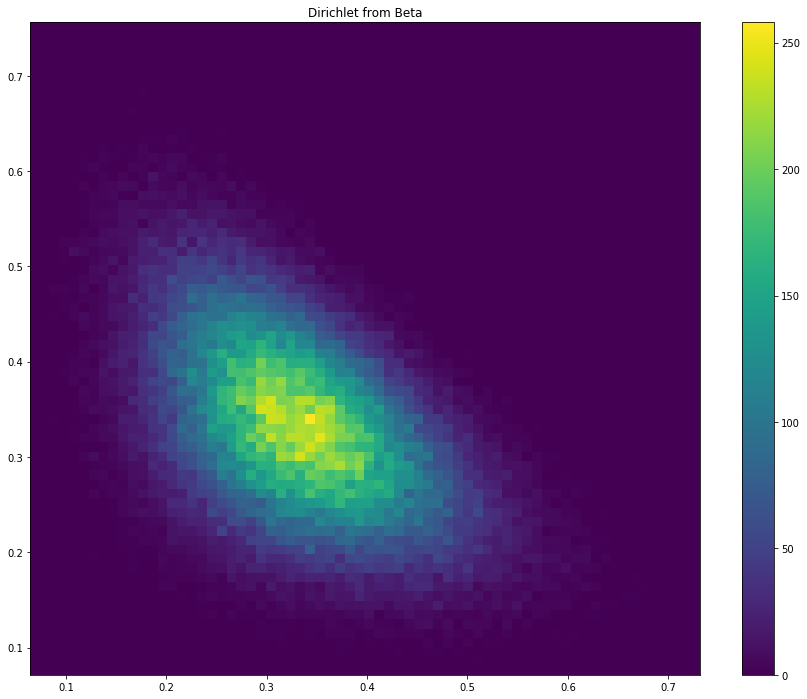

In [15]:
fig= plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

y1= return_beta_dist(alpha_1_val[0],alpha_2_val[0]+alpha_1_val[0]-1)
x2= return_beta_dist(alpha_1_val[1],alpha_2_val[1]+alpha_1_val[1]-1)
y2 = [(1-y1[i])*x2[i] for i in range(100000)]

binwidth = 0.01
num_bins1 = int(((math.ceil(max(y1) * 100) / 100.0) - (math.floor(min(y1)*100)/100))/binwidth) +1
num_bins2 = int(((math.ceil(max(y2) * 100) / 100.0) - (math.floor(min(y2)*100)/100))/binwidth) +1
plt.hist2d(y1,y2, bins=[num_bins1,num_bins2])
plt.title("Dirichlet from Beta")
plt.colorbar()
plt.show()